In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [3]:
data_path = "../data/brent_oil_prices_daily.csv"  # you confirmed this name

df = pd.read_csv(data_path)
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
df.columns


Index(['Date', 'Price'], dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [6]:
# Replace 'Date' with the actual column name if different
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows where Date could not be parsed (if any)
df = df.dropna(subset=['Date'])

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

df[['Date', df.columns[1]]].head()


C:\Users\Robel\AppData\Local\Temp\ipykernel_16704\3407409990.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


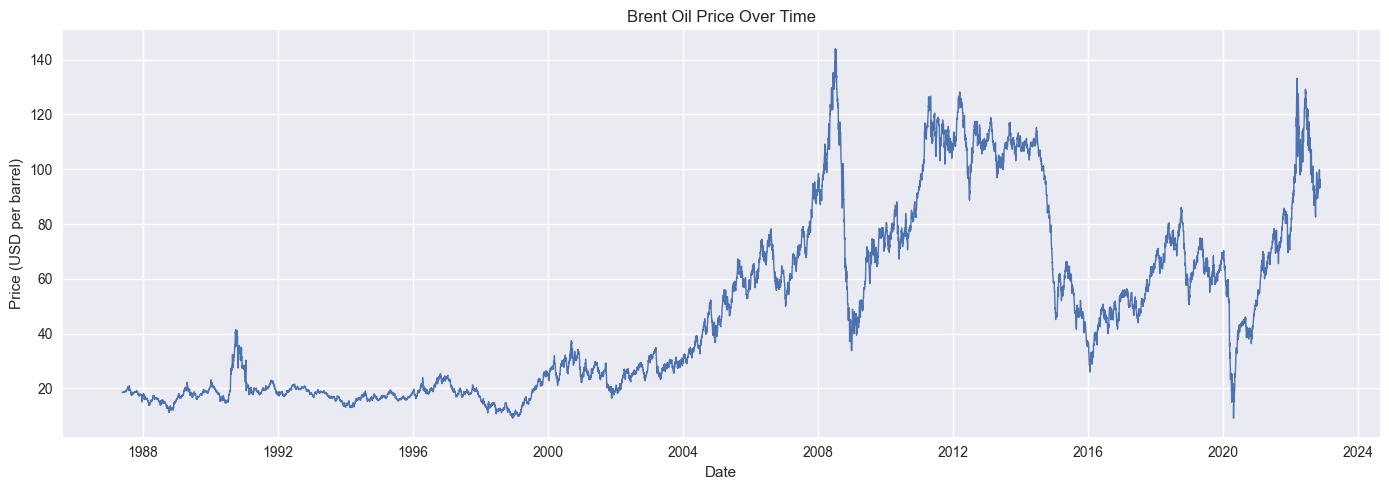

In [7]:
price_col = 'Price'  # change if your price column has another name

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df[price_col], linewidth=1)
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import numpy as np

df['log_price'] = np.log(df[price_col])
df['log_return'] = df['log_price'].diff()

df[['Date', price_col, 'log_return']].head(10)


,Date,Price,log_return
0,1987-05-20,18.63,NaN
1,1987-05-21,18.45,-0.009709
2,1987-05-22,18.55,0.005405
3,1987-05-25,18.60,0.002692
4,1987-05-26,18.63,0.001612
5,1987-05-27,18.60,-0.001612
6,1987-05-28,18.60,0.000000
7,1987-05-29,18.58,-0.001076
8,1987-06-01,18.65,0.003760
9,1987-06-02,18.68,0.001607


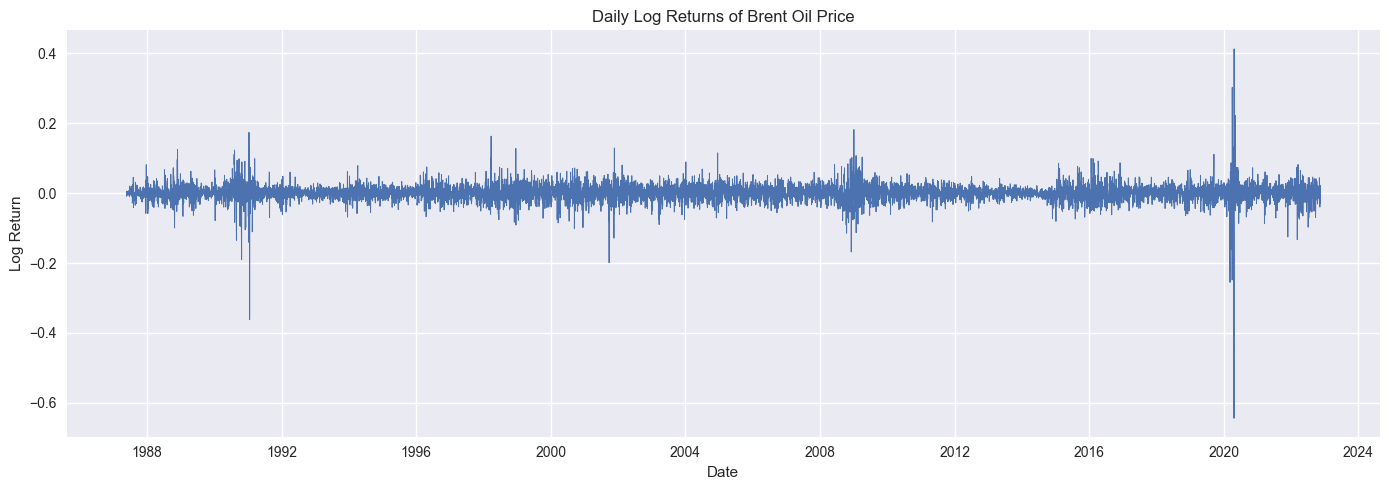

In [9]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['log_return'], linewidth=0.7)
plt.title('Daily Log Returns of Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()


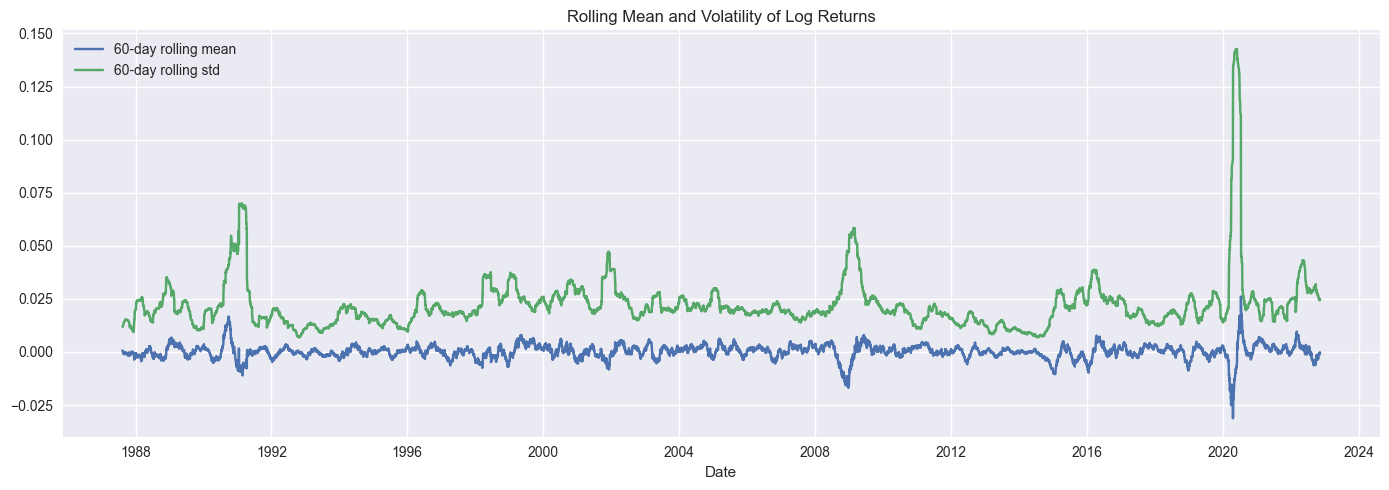

In [10]:
window = 60  # about 3 months of trading days

rolling_mean = df['log_return'].rolling(window=window).mean()
rolling_std = df['log_return'].rolling(window=window).std()

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], rolling_mean, label=f'{window}-day rolling mean')
plt.plot(df['Date'], rolling_std, label=f'{window}-day rolling std')
plt.title('Rolling Mean and Volatility of Log Returns')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
